# BIKE SHARING ASSIGNMENT


## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered.
#### The model should be built taking this 'cnt' as the target variable.

### Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)
 

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [316]:
# import Warnings
import warnings
warnings.filterwarnings('ignore')

In [317]:
# Importing Necessory Libarary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


In [318]:
# Read the Given Dataset 

bike_ds=pd.read_csv('day.csv')
bike_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [319]:
# checking last 5 rows
bike_ds.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [320]:
# shape of data set
print('No.of Rows in Dataset=',bike_ds.shape[0])
print('No.of Columns in Dataset=',bike_ds.shape[1])

No.of Rows in Dataset= 730
No.of Columns in Dataset= 16


In [321]:
# info of Dataset
bike_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Observation: There are no missing value in Dataset & dteday is of Object datatype which we will handle later

# Question 1 : Analysis on Categorical Variable

In [322]:
## Converting /Decoding Categorical Features for better Visualisation

# We will not decode Yr column as it have only 2 categories so in future while encoding the same which impact the same as our existing column

bike_ds['season']=bike_ds['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_ds['mnth']=bike_ds['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike_ds['weathersit']= bike_ds['weathersit'].map({1:'Clear',2:'Cloudy',3:'Light_rain',4:'Heavy_rain'})
bike_ds['weekday']= bike_ds['weekday'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',0:'Sun'})

In [323]:
bike_ds.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [324]:
## Unique values in Categorical Columns

cat_col=[ 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

for col in cat_col:
    print("Name of Column :",col)
    print(bike_ds[col].value_counts())
    
    print("****************************************************")
    

Name of Column : season
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
****************************************************
Name of Column : yr
1    365
0    365
Name: yr, dtype: int64
****************************************************
Name of Column : mnth
Aug      62
May      62
Dec      62
Jan      62
March    62
Oct      62
July     62
Sept     60
Apr      60
Nov      60
June     60
Feb      56
Name: mnth, dtype: int64
****************************************************
Name of Column : holiday
0    709
1     21
Name: holiday, dtype: int64
****************************************************
Name of Column : weekday
Tue     105
Mon     105
Thur    104
Wed     104
Sat     104
Fri     104
Sun     104
Name: weekday, dtype: int64
****************************************************
Name of Column : workingday
1    504
0    226
Name: workingday, dtype: int64
****************************************************
Name of Column : weathersit
Clear     

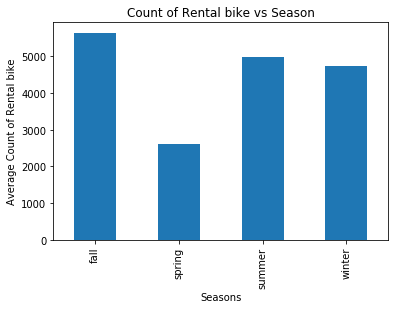

In [325]:
# Checking season Category : season (1:spring, 2:summer, 3:fall, 4:winter)

bike_ds.groupby('season')['cnt'].mean().plot.bar()

plt.title("Count of Rental bike vs Season")
plt.xlabel('Seasons')
plt.ylabel('Average Count of Rental bike')
plt.show()

#### Observation: As we can see Avg.count of total rental bikes in Fall season is more & less in Spring

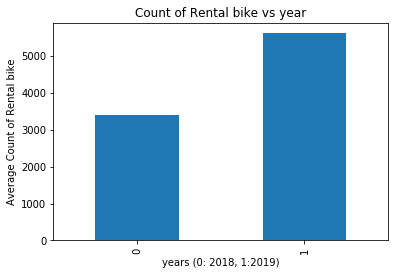

In [326]:
# Checking yr Category : year (0: 2018, 1:2019)

bike_ds.groupby('yr')['cnt'].mean().plot.bar()
plt.title("Count of Rental bike vs year")
plt.xlabel('years (0: 2018, 1:2019)')
plt.ylabel('Average Count of Rental bike')
plt.show()

#### Observation: As we can see Avg.count of total rental bikes in year:2019 is more & less in year:2019

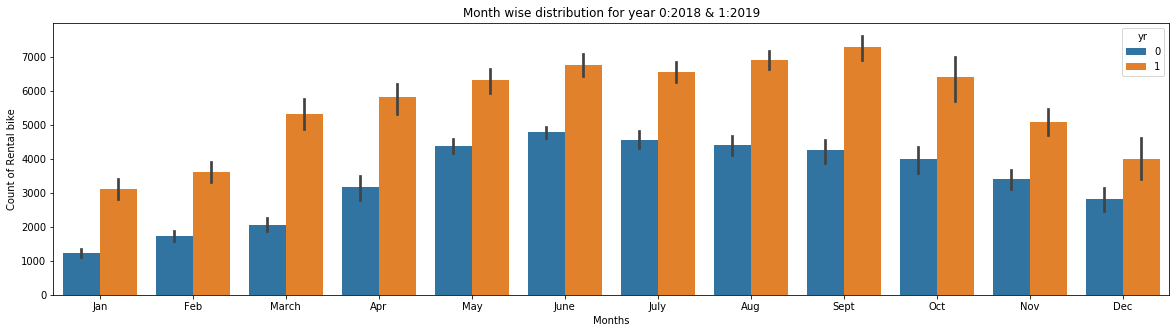

In [327]:
# Checking Months Category : 0-12 year (0: 2018, 1:2019)

plt.figure(figsize=(20,5))
sns.barplot(x = "mnth", y = "cnt", data = bike_ds,hue="yr")
plt.title("Month wise distribution for year 0:2018 & 1:2019")
plt.xlabel('Months')
plt.ylabel('Count of Rental bike')
plt.show()

#### Observation: As we can see Count of total rental bikes in year:2019 is more compare to year:2018 for each months

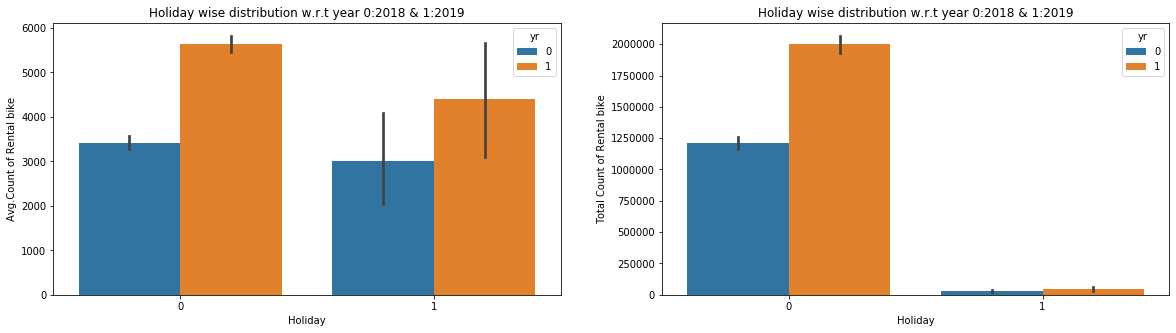

In [328]:
# Checking days Category :for all days

plt.figure(figsize=(20,5))

plt.subplot(122)
sns.barplot(x = "holiday", y = "cnt", data = bike_ds,estimator=np.sum,hue='yr')
plt.title("Holiday wise distribution w.r.t year 0:2018 & 1:2019")
plt.xlabel('Holiday')
plt.ylabel('Total Count of Rental bike')

plt.subplot(121)
sns.barplot(x = "holiday", y = "cnt", data = bike_ds,estimator=np.mean,hue='yr')
plt.title("Holiday wise distribution w.r.t year 0:2018 & 1:2019")
plt.xlabel('Holiday')
plt.ylabel('Avg.Count of Rental bike')


plt.show()


#### Observation: From first graph Avg.counts of rental bike doesnt show any major difference for holiday & non holiday  but if  we can see from second graph Total count of Rental bike is high in non holiday as compare to holiday w.r.t Year

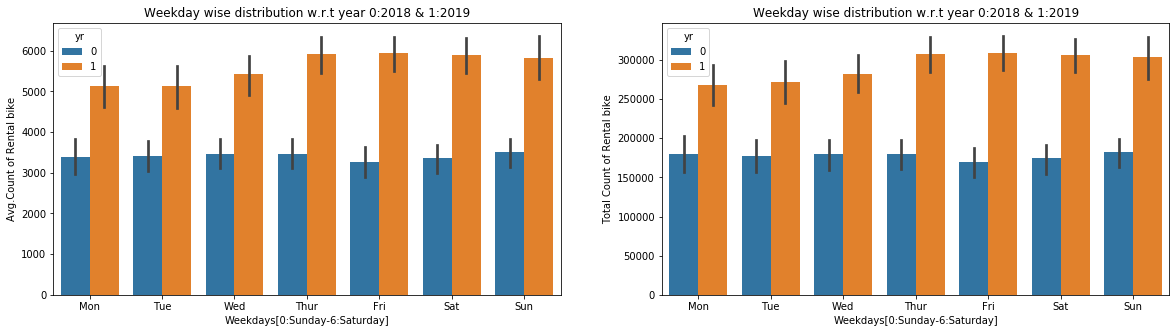

In [329]:
# Checking Weekdays Category :for both year

plt.figure(figsize=(20,5))

plt.subplot(122)
sns.barplot(x = "weekday", y = "cnt", data = bike_ds,estimator=np.sum,hue='yr')
plt.title("Weekday wise distribution w.r.t year 0:2018 & 1:2019")
plt.xlabel('Weekdays[0:Sunday-6:Saturday]')
plt.ylabel('Total Count of Rental bike')

plt.subplot(121)
sns.barplot(x = "weekday", y = "cnt", data = bike_ds,estimator=np.mean,hue='yr')
plt.title("Weekday wise distribution w.r.t year 0:2018 & 1:2019")
plt.xlabel('Weekdays[0:Sunday-6:Saturday]')
plt.ylabel('Avg.Count of Rental bike')

plt.show()

#### Observation: From Above Graphs we can see there are no such significant difference for Rental count in year 2018 for all days but there is slight increase in Rental count on Thursday to Sunday than other days

 weathersit catergories renaming as below: 
    - 1: Clear
    - 2: Cloudy
    - 3: Light Rain 
    - 4: Heavy Rain 

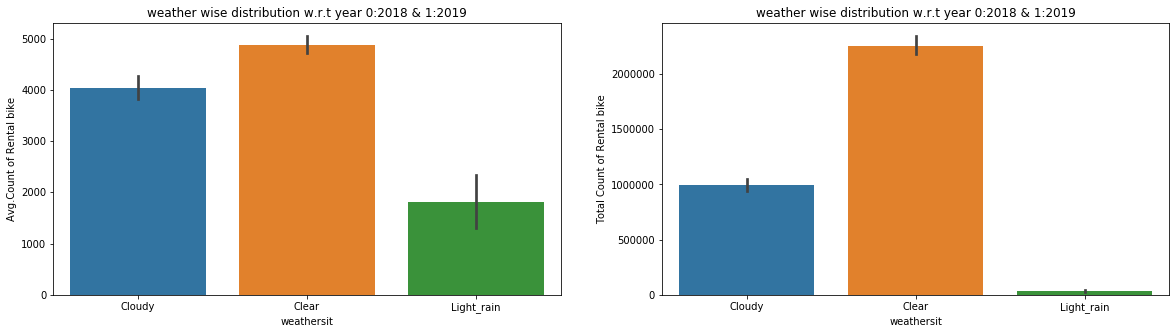

In [330]:
### Analysis on Weathersit:

plt.figure(figsize=(20,5))

plt.subplot(122)
sns.barplot(x = "weathersit", y = "cnt", data = bike_ds,estimator=np.sum)
plt.title("weather wise distribution w.r.t year 0:2018 & 1:2019")
plt.xlabel('weathersit')
plt.ylabel('Total Count of Rental bike')

plt.subplot(121)
sns.barplot(x = "weathersit", y = "cnt", data = bike_ds,estimator=np.mean)
plt.title("weather wise distribution w.r.t year 0:2018 & 1:2019")
plt.xlabel('weathersit')
plt.ylabel('Avg.Count of Rental bike')

plt.show()

#### Observation: Total & Average count of Rental Bikes in clear weathersit is high & less in Light_rain,Scattered Cloudy days

In [331]:
bike_ds.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

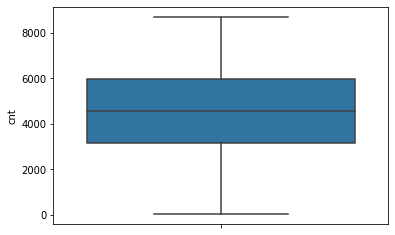

In [332]:
# Checking Outlier of Count Variable
sns.boxplot(y="cnt", data=bike_ds)

#### Observation: As Target Variable doesnt have any outlier in their dataset

In [333]:
# checking all Variable except target variable
bike_ds_num1 = bike_ds.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit','casual', 'registered', 'cnt'],axis=1)


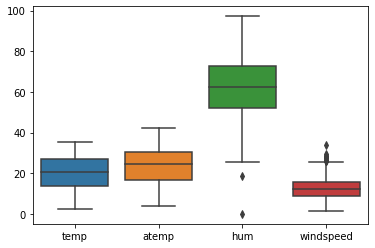

In [334]:
sns.boxplot(data=bike_ds_num1)

#### Observation: We found outlier in hum & some of the outlier in windspeed near whiskers only, but we can manage with this we will not take any action for outlier

In [335]:
bike_ds_num2 = bike_ds.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit','temp', 'atemp', 'hum', 'windspeed'],axis=1)

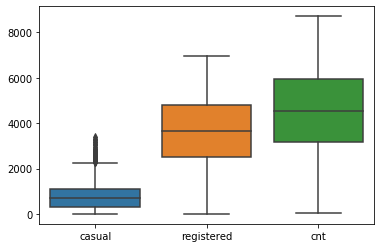

In [336]:
sns.boxplot(data=bike_ds_num2)

#### Observation: We did not found any outlier in Casual,Registered & cnt columns

# Question 2: Why is it important to use drop_first=True during dummy variable creation? 

### Dummy Variable is use to create new columns of different distinct categories in Binary classification i.e (0 or 1) & Drop_first is use to reduce the columns, for better explanation please see below images of Drop_first = False Vs. Drp_first =True

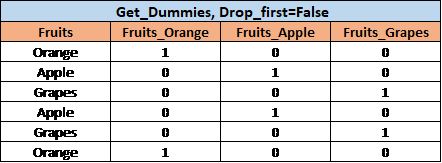

In [337]:
from IPython.display import Image
Image(filename='Drop_first_False.png')


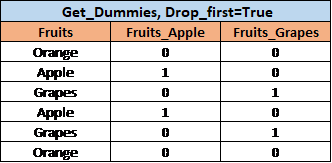

In [338]:
from IPython.display import Image
Image(filename='Drop_first_True.png')

# Question 3 :Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?

In [339]:
bike_ds.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801


In [340]:
""" 1. Get rid of Redundant Variables/Columns
    2.As instant is index so we will drop that
    3.dteday is date column where we have year & month so we can drop this 
    4.casual & registered is combination of cnt (casual + registerd=cnt) so it impact more while analysis, so this
    is also redundant features we will drop that also"""  


# Dropping instant,dteday,casual & regidtered columns

bike_ds =bike_ds.drop(['instant','dteday','casual','registered'],axis=1)


In [341]:
## Looking dataset after dropping redundant columns
bike_ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [342]:
## Creating continuous Numerical columns Dataset
Num_dataset= bike_ds[['temp','atemp','hum','windspeed','cnt']]

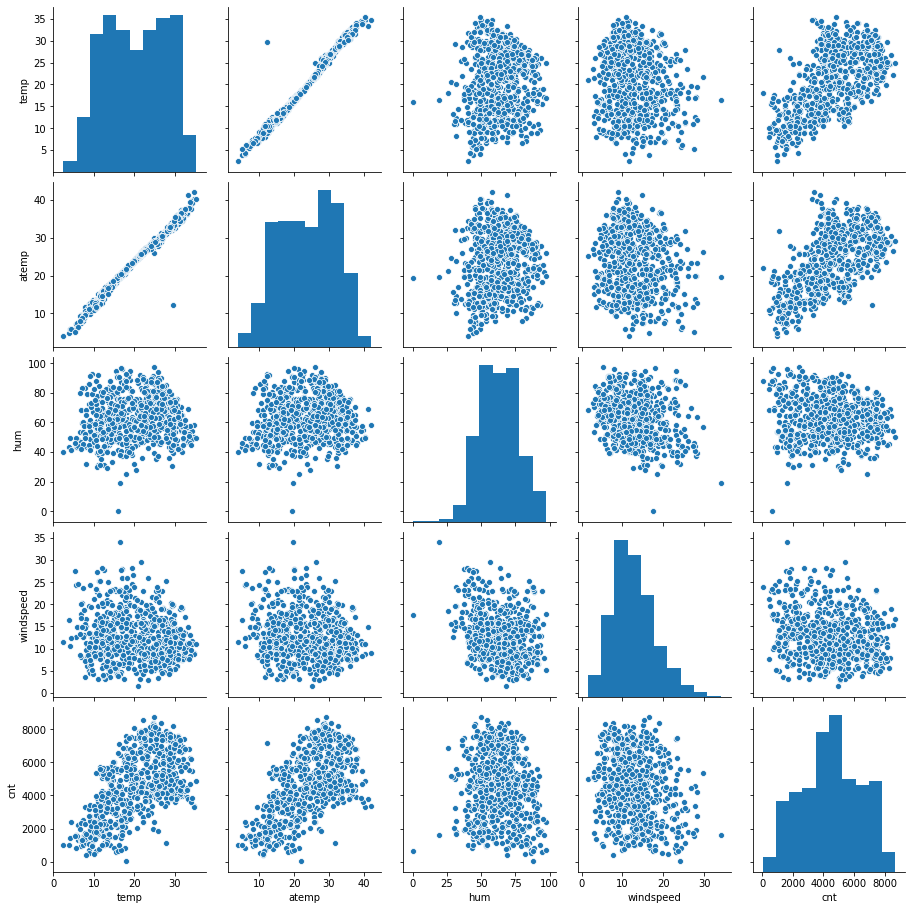

In [343]:
sns.pairplot(Num_dataset)
plt.show()

### Obervation: As we can see atemp & temp  has some what positive correlation with Target Variable 'cnt' & 'atemp' and 'temp' has positive corelation between them

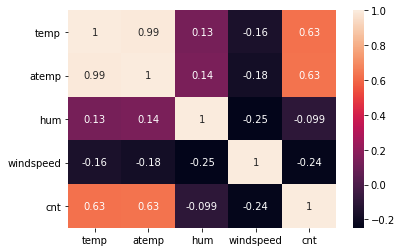

In [344]:
sns.heatmap(data=Num_dataset.corr(),annot=True)
plt.show()

#### Observation: As we can see from Pairplot & Heat Map also in Numerical Dataset 'atemp' & 'temp' has highest corelation with Target variable Cnt

"**********************************************************************************************************************"

# Question 4 :How did you validate the assumptions of Linear Regression after building the model on the training set?

#### Assumption:
1) There is Linear Relationship between Independent & Target Variable (R^2 should be high)

2) Residual terms are normally distribuated with mean = 0

3) No or little Multicollinearity (i.e VIF < 5)

In [345]:
# copy the exsting dataset for further analysis

bike_ds_new = bike_ds
bike_ds_new.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [346]:
# Encoding the categorical varibles

status=pd.get_dummies(bike_ds_new['season'],drop_first=True)
status1=pd.get_dummies(bike_ds_new['mnth'],drop_first=True)
status2=pd.get_dummies(bike_ds_new['weekday'],drop_first=True)
status3=pd.get_dummies(bike_ds_new['weathersit'],drop_first=True)

In [347]:
bike_ds_new =pd.concat([bike_ds_new,status,status1,status2,status3],axis=1)

bike_ds_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,Light_rain
0,spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [348]:
## Shape afetr get dummies
bike_ds_new.shape

(730, 34)

In [349]:
## After encoding of categorical variable we dont need to keep parent categorical columns, we will drop the same
bike_ds_new=bike_ds_new.drop(['season','mnth','weekday','weathersit'],axis=1)
bike_ds_new.shape

(730, 30)

In [350]:
pd.set_option('display.max_column', 50)
bike_ds_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,Light_rain
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.336986,0.028767
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [351]:
## Separting X & y Variables
y=bike_ds_new.pop('cnt')
X=bike_ds_new

In [352]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,Light_rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [353]:
## Splitting Data into Train & Test Set

from sklearn.model_selection import train_test_split
np.random.seed(0) # We specify this so that the train and test data set always have the same rows, respectively
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [354]:
## Shape of Train & test 
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(510, 29)
(219, 29)
(510,)
(219,)


## Modeling:

In [355]:
# Importing required library
from sklearn.linear_model import LinearRegression  # Linear Model
from sklearn.feature_selection import RFE # RFE to find best 15 variable out of 29
from sklearn.metrics import r2_score  ## Accuracy check with R^2
from sklearn.preprocessing import MinMaxScaler # Scalling the Features for better Model prediction
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF to check Multicollinarity

In [356]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [357]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy,Light_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Now We have all features in 0 to 1 Scale

## Building as Model using RFE,Automated Process

In [358]:
## As we have 29 columns so analysis on 29 colums in statemodel become cumbersome process 
## we will pick initially top 15 features with the help of RFE library

# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [360]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('Cloudy', True, 1),
 ('Light_rain', True, 1)]

In [361]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Cloudy', 'Light_rain'],
      dtype='object')

In [362]:
## Now We will work on these 15 Features only, after that we will do Manual Elimination process with Statsmodels & VIF

X_train_rfe= X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Cloudy', 'Light_rain']]

In [363]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   temp        510 non-null    float64
 3   hum         510 non-null    float64
 4   windspeed   510 non-null    float64
 5   spring      510 non-null    uint8  
 6   summer      510 non-null    uint8  
 7   winter      510 non-null    uint8  
 8   Dec         510 non-null    uint8  
 9   Jan         510 non-null    uint8  
 10  July        510 non-null    uint8  
 11  Nov         510 non-null    uint8  
 12  Sept        510 non-null    uint8  
 13  Cloudy      510 non-null    uint8  
 14  Light_rain  510 non-null    uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 28.9 KB


## Manual Elimination using Statsmodel & VIF

In [364]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def lm_summary_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [365]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def features_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Model 1:

In [366]:
# Lets Check the pValue,VIF & R^2 of all Features

top_15=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Cloudy', 'Light_rain']

lm_summary_model(top_15)
features_vif(top_15)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.34e-189
Time:                        23:22:05   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2805.5562    313.247      8.956      0.0

#### As we can observe  all features p-Values in below 0.05 but we find hum & temp has high VIF, We will Drop Hum column first for further model

## Model-2

In [367]:
# Dropping the variable Hum as it is insignificant as it has high VIF
Top_14 = ['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Cloudy', 'Light_rain']
lm_summary_model(Top_14)
features_vif(Top_14)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.57e-186
Time:                        23:22:07   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2165.7529    279.173      7.758      0.0

#### As we can observed all parameter within range but we will check further after dropping summer variable as it has high p value than others. We tried to bring it down to zero of all features p values

### Model-3

In [368]:
Top_13 = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Cloudy', 'Light_rain']
lm_summary_model(Top_13)
features_vif(Top_13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.08e-186
Time:                        23:22:08   Log-Likelihood:                -4122.5
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     496   BIC:                             8332.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2536.8296    220.087     11.527      0.0

### Model is Good with All Parameter lets try further model b dropping 'Nov' Variable as it has p value 0.010

### Model -4

In [369]:
Top_12 = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'Dec', 'Jan', 'July', 'Sept', 'Cloudy', 'Light_rain']
lm_summary_model(Top_12)
features_vif(Top_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.02e-186
Time:                        23:22:10   Log-Likelihood:                -4126.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     497   BIC:                             8333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2428.8926    217.355     11.175      0.0

## Dropping Dec

### Model- 5

In [370]:
Top_11 = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'Jan', 'July', 'Sept', 'Cloudy', 'Light_rain']
lm_summary_model(Top_11)
features_vif(Top_11)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.13e-186
Time:                        23:22:12   Log-Likelihood:                -4128.2
No. Observations:                 510   AIC:                             8280.
Df Residuals:                     498   BIC:                             8331.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2331.5423    213.001     10.946      0.0

In [371]:
Top_10 = ['yr', 'holiday', 'temp', 'windspeed', 'spring',
       'winter', 'July', 'Sept', 'Cloudy', 'Light_rain']
lm_summary_model(Top_10)
features_vif(Top_10)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.16e-186
Time:                        23:22:12   Log-Likelihood:                -4131.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2211.5088    207.921     10.636      0.0

### From Above TOP_10 Features we found Generlized model where all Features p values is ZEROS & VIF is below 5 & R-Squared= 0.833

In [372]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [373]:

#Build a model with above columns
lr = build_model_sk(X_train[Top_10],y_train)
print(lr.intercept_,lr.coef_)

2211.508827101716 [ 2034.72382461  -856.64668309  3924.05050731 -1215.2874211
  -963.02639682   410.93814773  -632.07654487   501.57078185
  -705.20532081 -2489.46101906]


In [374]:
y_train_pred = lr.predict(X_train[Top_10])

In [375]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

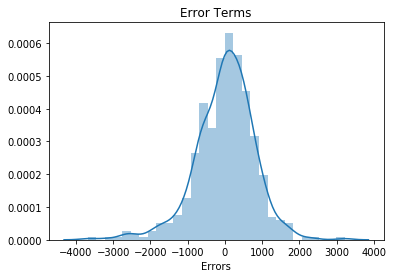

In [376]:
plot_res_dist(y_train, y_train_pred)

In [377]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8328664237258241

## Predicting On Test Data

In [378]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [379]:
#Columns from our final model

#Predict the values for test data
y_test_pred = lr.predict(X_test[Top_10])

In [380]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8070101019557958

In [381]:
Top_10

['yr',
 'holiday',
 'temp',
 'windspeed',
 'spring',
 'winter',
 'July',
 'Sept',
 'Cloudy',
 'Light_rain']

In [382]:
df=X_test[Top_10]

In [383]:
y_test_pred_df=pd.DataFrame(y_test_pred, columns = ['Target'])

In [384]:
X_test_con = pd.concat([df,y_test_pred_df],1)

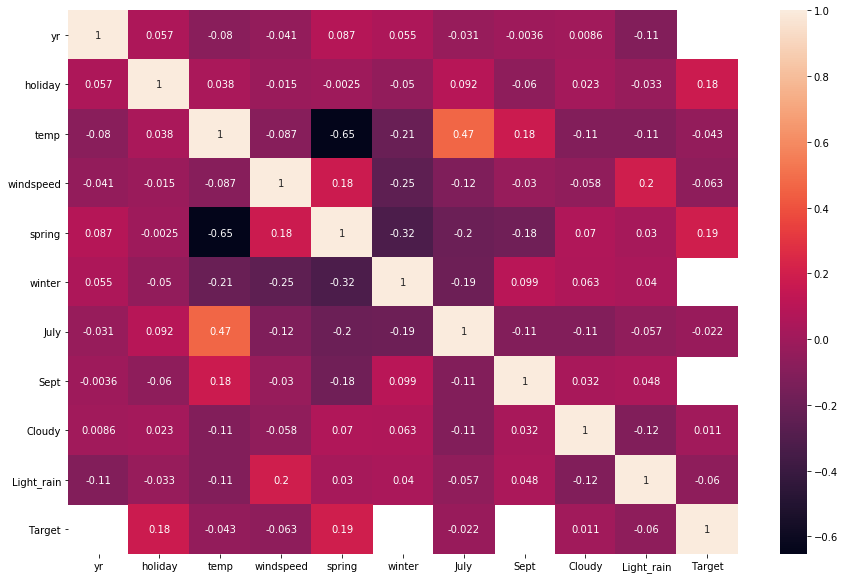

In [385]:
plt.figure(figsize=[15,10])
sns.heatmap(data=X_test_con.corr(),annot=True)
plt.show()

### Analysing the above model, the comapany should focus on the following features:
Company should focus on expanding business during Spring.
Company should focus on expanding business during September.
Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
There would be less bookings during Light Rain, they could probably use this time to serive the bikes without having business impact.

## Conclusion
### Significant variables to predict the demand for shared bikes

holiday

temp

windspeed

Season(Spring,winter)

months(July, September)

Year 

weathersit( Light_rain, Cloudy)